In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sp
import pycodamath as coda
from pycodamath import extra
import scipy.optimize as optimization

In [43]:
import pandas as pd
import re

# Load data
data = pd.read_csv('../data/2-meteorites.csv', sep=',')
data.rename(columns={'Unnamed: 0': 'Location'}, inplace=True)

# Extract the part inside parentheses into 'Type'
data['Type'] = data['Location'].str.extract(r'\((.*?)\)')

# Remove the parentheses and content from 'Location'
data['Location'] = data['Location'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

# Reorder columns: Location, Type, then the rest
cols = ['Location', 'Type'] + [col for col in data.columns if col not in ['Location', 'Type']]
data = data[cols]

# Check result
print(data.head())
print(data.shape)


    Location Type   SiO2   Al2O3    FeO   MnO    MgO     Fe    Ni    Co     C
0    Allende   cc  34.23    3.27  27.15  0.18  24.62   0.17  0.36  0.01  0.29
1       Bali   cc  33.77    3.16  26.51  0.19  24.54   0.15  0.22  0.01  0.57
2  Efremovka   cc  34.31    3.37  17.20  0.19  24.71   5.51  1.37  0.06  0.76
3   Coolidge   cc  34.42    3.31   7.26  0.24  24.99   8.28  1.35  0.08  0.19
4    Ankober   hc  35.35    2.32  13.05  0.32  22.86  13.96  1.71  0.10  0.10
(12, 11)


#### Closure

In [44]:
# Apply coda closure
data.iloc[:, 2:] = data.iloc[:, 2:].coda.closure(100)

print(data.head())

    Location Type       SiO2     Al2O3        FeO       MnO        MgO  \
0    Allende   cc  37.915374  3.622065  30.073106  0.199380  27.270713   
1       Bali   cc  37.892729  3.545781  29.746409  0.213196  27.535907   
2  Efremovka   cc  39.220393  3.852309  19.661637  0.217193  28.246456   
3   Coolidge   cc  42.960559  4.131303   9.061408  0.299551  31.190714   
4    Ankober   hc  39.378411  2.584382  14.537150  0.356467  25.465077   

          Fe        Ni        Co         C  
0   0.188303  0.398759  0.011077  0.321223  
1   0.168312  0.246858  0.011221  0.639587  
2   6.298583  1.566072  0.068587  0.868770  
3  10.334498  1.684973  0.099850  0.237144  
4  15.550852  1.904868  0.111396  0.111396  


In [45]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Example data
locations = data['Location']

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Store results
latitudes = []
longitudes = []

for place in locations:
    try:
        location = geolocator.geocode(place)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except Exception as e:
        print(f"Error geocoding {place}: {e}")
        latitudes.append(None)
        longitudes.append(None)
    
    time.sleep(1)  # To avoid hitting rate limits

# Add to dataframe
data['Latitude'] = latitudes
data['Longitude'] = longitudes

print(data[['Location', 'Latitude', 'Longitude']])


        Location   Latitude   Longitude
0        Allende  19.435551  -99.137134
1           Bali  -8.227130  115.191920
2      Efremovka  52.535145   77.343155
3       Coolidge  32.977839 -111.517624
4        Ankober   9.591155   39.733821
5        Faucett  39.600601  -94.801019
6           Kabo  12.826603   -2.244833
7        Marilia -22.217200  -49.950006
8          Inman  38.232023  -97.773333
9         Khohar  24.635327   81.920713
10        Hedjaz  31.968505   35.968183
11  Hallingeberg  57.830241   16.250211


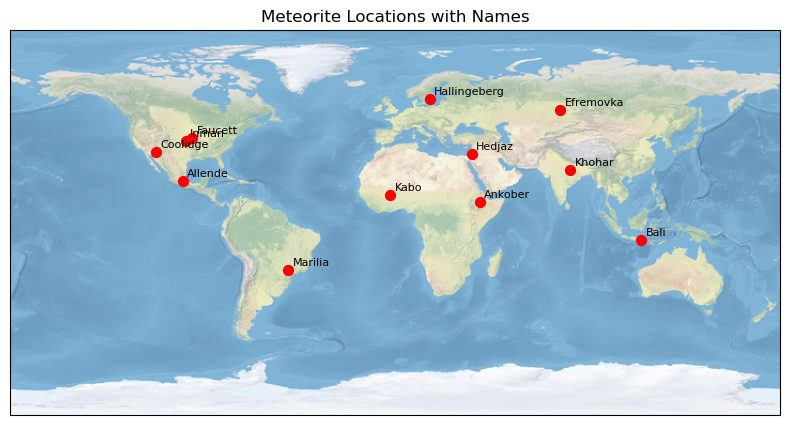

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Clean up column names if needed
data.columns = data.columns.str.strip()

# Create figure
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Plot points
ax.scatter(data['Longitude'], data['Latitude'], color='red', s=50, transform=ccrs.PlateCarree())

# Add location names
for idx, row in data.iterrows():
    ax.text(row['Longitude'] + 2, row['Latitude'] + 2,  # slight offset to avoid overlap
            row['Location'],
            fontsize=8,
            transform=ccrs.PlateCarree())



plt.title('Meteorite Locations with Names')
plt.savefig('../handin/figures/locations.png', dpi=300, bbox_inches='tight')
plt.show()


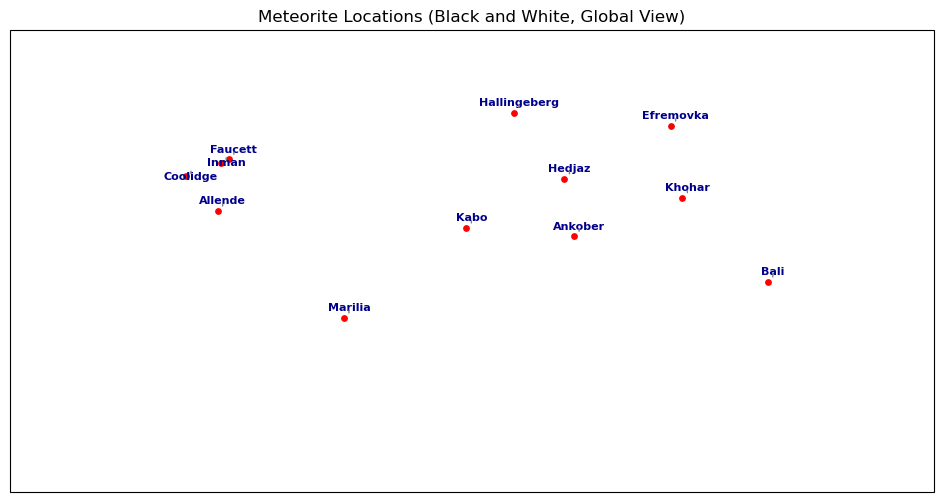

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text

# Clean column names
data.columns = data.columns.str.strip()

# Create figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set map to global view
ax.set_global()

# Add black-and-white base
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot points
ax.scatter(data['Longitude'], data['Latitude'], color='red', s=15, transform=ccrs.PlateCarree())

# Collect text labels
texts = []
for idx, row in data.iterrows():
    text = ax.text(row['Longitude'] + 2, row['Latitude'] + 2, row['Location'],
                   fontsize=8, color='darkblue', weight='bold', transform=ccrs.PlateCarree())
    texts.append(text)

# Adjust labels to avoid overlap
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'xy'}, 
            autoalign='y', expand_points=(0.5, 0.5), arrowprops=dict(arrowstyle='-', color='gray'))

plt.title('Meteorite Locations (Black and White, Global View)')
plt.show()
